In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

pd.set_option('display.max_columns', None)

In [16]:
dataset = pd.read_csv("Kidney_data.csv")

# Preprocessing
dataset = dataset.drop('id', axis=1)
dataset['rbc'] = dataset['rbc'].replace({'normal': 0, 'abnormal': 1})
dataset['pc'] = dataset['pc'].replace({'normal': 0, 'abnormal': 1})
dataset['pcc'] = dataset['pcc'].replace({'notpresent': 0, 'present': 1})
dataset['ba'] = dataset['ba'].replace({'notpresent': 0, 'present': 1})
dataset['htn'] = dataset['htn'].replace({'yes': 1, 'no': 0})
dataset['dm'] = dataset['dm'].replace({'\tyes': 'yes', ' yes': 'yes', '\tno': 'no'})
dataset['dm'] = dataset['dm'].replace({'yes': 1, 'no': 0})
dataset['cad'] = dataset['cad'].replace({'\tno': 'no', 'yes': 1, 'no': 0})
dataset['appet'] = dataset['appet'].replace({'good': 1, 'poor': 0})
dataset['pe'] = dataset['pe'].replace({'yes': 1, 'no': 0})
dataset['ane'] = dataset['ane'].replace({'yes': 1, 'no': 0})
dataset['classification'] = dataset['classification'].replace({'ckd\t': 'ckd'})
dataset["classification"] = dataset["classification"].map({'ckd': 1, 'notckd': 0})

# Convert columns to numeric types and fill missing values
dataset['pcv'] = pd.to_numeric(dataset['pcv'], errors='coerce')
dataset['wc'] = pd.to_numeric(dataset['wc'], errors='coerce')
dataset['rc'] = pd.to_numeric(dataset['rc'], errors='coerce')
features = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
           'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
           'appet', 'pe', 'ane']
dataset[features] = dataset[features].fillna(dataset[features].median())

# Dropping unimportant columns
dataset.drop('pcv', axis=1, inplace=True)

# Feature selection (based on your previous step)
X = dataset[['sg', 'htn', 'hemo', 'dm', 'al', 'appet', 'rc', 'pc']]
y = dataset['classification']

/var/folders/6j/ctsgnxrx4r7ft9b56b774tfm0000gn/T/ipykernel_93500/3632059075.py:26: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset[features] = dataset[features].fillna(dataset[features].median())


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

In [19]:
def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("="*60)
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=33), param_grid_rf, cv=5)
evaluate_model(grid_rf, "Random Forest")

Model: Random Forest
Accuracy: 0.975
Confusion Matrix:
[[55  3]
 [ 0 62]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        58
           1       0.95      1.00      0.98        62

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



In [22]:
param_grid_ada = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1]
}
grid_ada = GridSearchCV(AdaBoostClassifier(random_state=33), param_grid_ada, cv=5)
evaluate_model(grid_ada, "AdaBoost")

Model: AdaBoost
Accuracy: 0.975
Confusion Matrix:
[[55  3]
 [ 0 62]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        58
           1       0.95      1.00      0.98        62

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



In [23]:
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 10]
}
grid_gb = GridSearchCV(GradientBoostingClassifier(random_state=33), param_grid_gb, cv=5)
evaluate_model(grid_gb, "Gradient Boosting")

Model: Gradient Boosting
Accuracy: 0.975
Confusion Matrix:
[[55  3]
 [ 0 62]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        58
           1       0.95      1.00      0.98        62

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



In [25]:
# Check the shape of X_train
print("Shape of X_train:", X_train.shape)

# Fit the Random Forest model
rf = RandomForestClassifier(random_state=33)
rf.fit(X_train, y_train)

# Check the length of feature_importances_
print("Length of feature_importances_:", len(rf.feature_importances_))

# Check the number of columns in X
print("Number of columns in X:", len(X.columns))

# Plot feature importances if they match
if len(rf.feature_importances_) == len(X.columns):
    plt.figure(figsize=(8,6))
    ranked_features = pd.Series(rf.feature_importances_, index=X.columns)
    ranked_features.nlargest(8).plot(kind='barh')
    plt.show()
else:
    print("Feature importances and columns length do not match!")


Shape of X_train: (280, 8)
Length of feature_importances_: 8
Number of columns in X: 23
Feature importances and columns length do not match!


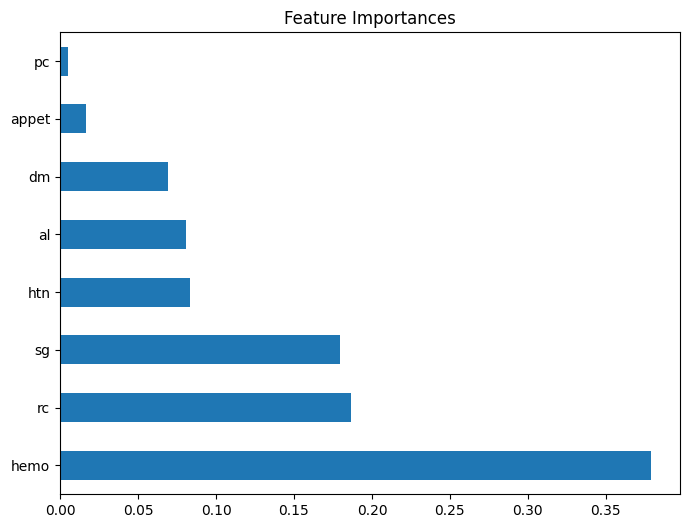

In [27]:


# Features used for training
selected_features = ['sg', 'htn', 'hemo', 'dm', 'al', 'appet', 'rc', 'pc']

# Fit the Random Forest model
rf = RandomForestClassifier(random_state=33)
rf.fit(X_train, y_train)

# Check if feature importances match the selected features
if len(rf.feature_importances_) == len(selected_features):
    plt.figure(figsize=(8,6))
    ranked_features = pd.Series(rf.feature_importances_, index=selected_features)
    ranked_features.nlargest(8).plot(kind='barh')
    plt.title('Feature Importances')
    plt.show()
else:
    print("Feature importances and selected features length do not match!")
